# Summary

This notebook analyses interactions between user and topics.

In [1]:
import pandas as pd

user2topic = pd.read_csv("user2topic.csv")

# Topic Share

In [2]:
import numpy as np

topic_share = user2topic.pivot(index=['topic'],columns=['user'])
topic_share = topic_share.div(topic_share.sum(axis=1),axis=0).fillna(0)
np.testing.assert_allclose( topic_share.sum(1), 1.0, atol=1e-6)
topic_share = topic_share.loc[(-topic_share.max(1)).argsort()]

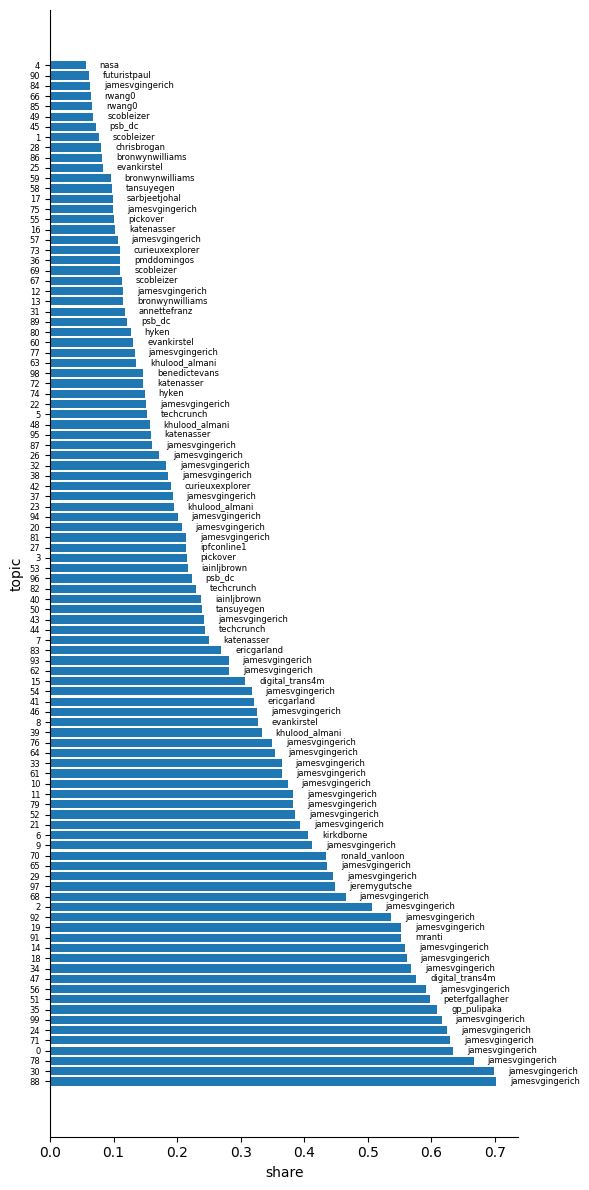

In [3]:
import matplotlib.pyplot as plt

x = topic_share.max(1).index
y = topic_share.max(1).values
labels = topic_share.columns[topic_share.values.argmax(1)].droplevel(0)

fig, ax = plt.subplots(figsize=(6,12))
bars = ax.barh(range(len(x)),y,tick_label=x)
# https://matplotlib.org/stable/gallery/statistics/barchart_demo.html#sphx-glr-gallery-statistics-barchart-demo-py
ax.bar_label(bars,labels,padding=10,fontsize=6)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_ylabel("topic")
ax.set_xlabel("share")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()